# Применение машинного обучение для определения рака груди. Описание проекта.

Ссылка на Kaggle: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

В рамках данного проекта будет проверена адекватность применения методов машинного обуения в медицинской сфере для определения рака груди.

# Загрузка и обработка данных.

Загружаем все необходимые нам библиотеки, фиксируем значение random state, которое пригодится при машинном обучении.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)

!pip install catboost
from catboost import CatBoostClassifier

RNDM_STATE = 42

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.4 MB/s eta 0:00:00


Загружаем данные.

In [2]:
df = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/Datasets/breast-cancer.csv',
    sep=',')

Смотрим инфомарцию о данных.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Входными признаками являются идентификационный номер записи (id) и ряд числовых признаков, характеризующих разные замеры опухоли.

Целевым признаком является группа опухоли (diagnosis): M - злокачественная опухоль (положительный класс), B - доброкачественная (отрицательный класс).


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Строим гистограммы для каждого из признаков.

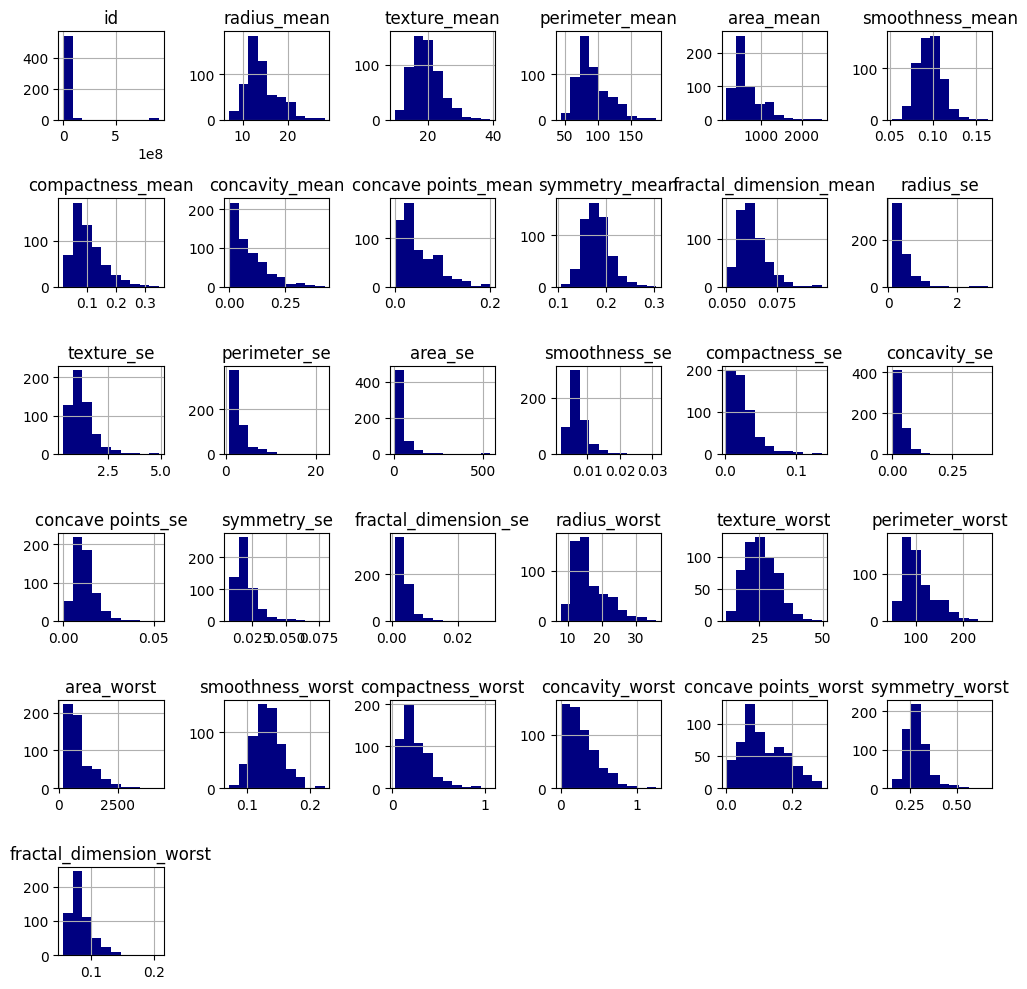

In [6]:
df.hist(figsize=(10, 10), color='navy')
plt.tight_layout()
plt.show()

Проверяем данные на пропуски.

In [7]:
pd.DataFrame(
    round(
        df.isna().mean() * 100,
    )
).style.background_gradient('coolwarm')

,0
id,0.000000
diagnosis,0.000000
radius_mean,0.000000
texture_mean,0.000000
perimeter_mean,0.000000
area_mean,0.000000
smoothness_mean,0.000000
compactness_mean,0.000000
concavity_mean,0.000000
concave points_mean,0.000000


Пропуски не обнаружены.

Проверяем данные на явные и неявные дубликаты.

In [8]:
df.duplicated().sum()

0

In [9]:
df.duplicated(subset=['id'], keep=False).sum()

0

Дубликаты в данных не найдены.

Удаляем бессмысленный для нашей задачи столбец id.

In [10]:
df = df.drop('id', axis=1)

Заменяем диагнозы на единицу для злокачественной опухоли и ноль для доброкачественной.

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

df['diagnosis'] = df['diagnosis'].astype(int)

Отдельно смотрим на баланс классов.

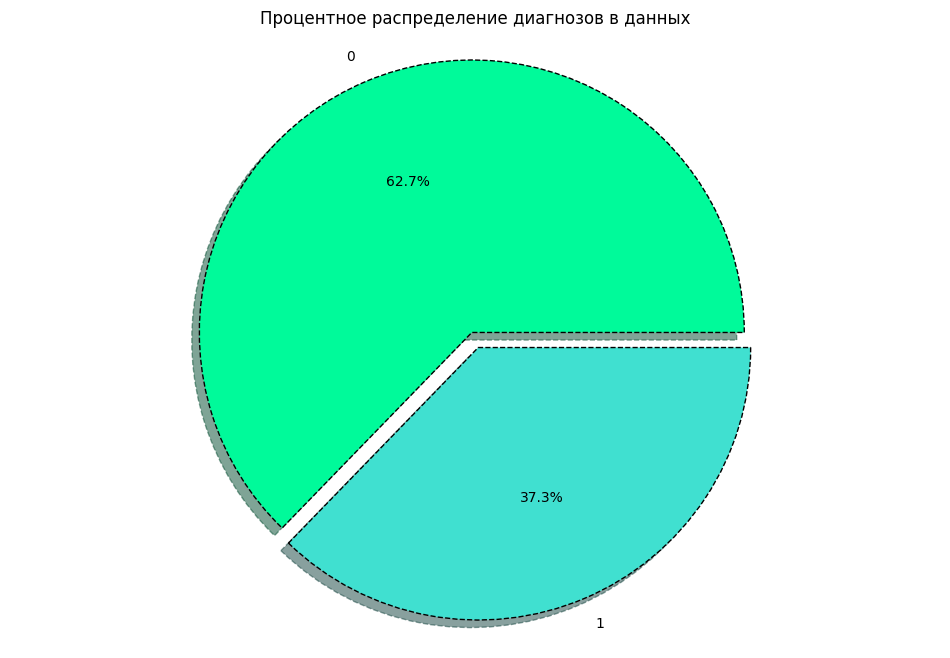

In [12]:
counts = df['diagnosis'].value_counts()

explode = [0.05, 0.01] + [0] * (len(counts) - 3)
plt.figure(figsize=(12, 8))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    shadow=True,
    explode=explode,
    colors=['mediumspringgreen', 'turquoise'] + ['C0'] * (len(counts) - 3),
    wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': 'k'},
)
plt.axis('equal')
plt.title('Процентное распределение диагнозов в данных')
plt.show()

Имеется перекос в сторону отрицательного класса, который надо будет учесть далее.

# Корреляции.

Смотрим корреляции признаков.

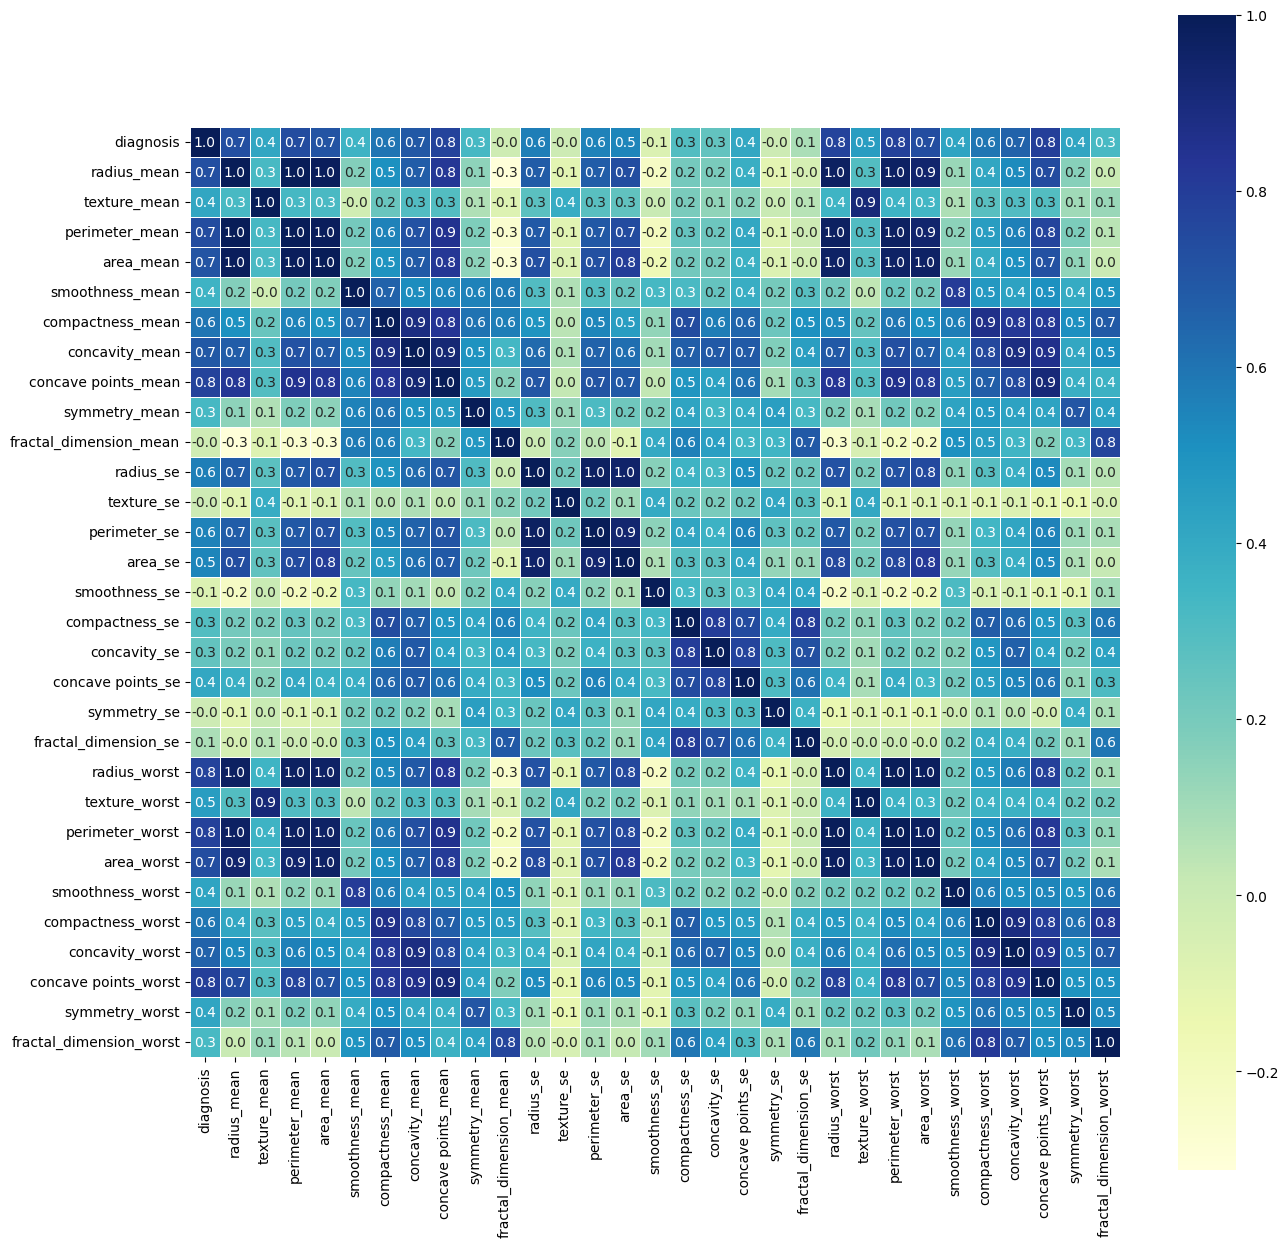

In [13]:
correlations = df.corr()

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    correlations,
    annot=True,
    linewidths=0.5,
    fmt='.1f',
    ax=ax,
    cmap='YlGnBu',
    square=True,
)

plt.show()

Многие из признаков сильно коррелируют между собой, что логично, учитывая, что речь идёт о медицинских показателях, часто взаимозависимых. Оставим все признаки, какие у нас есть.

Смотрим, как каждый из входных признаков влияет на целевой.

In [14]:
corr_target = abs(correlations['diagnosis'])
corr_target.sort_values(ascending = False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

# Обучение моделей на тренировочной выборке.

Разделяем данные на тренировочнцю и тестовую выборку.

In [15]:
target = df['diagnosis']
features = df.drop(['diagnosis'], axis = 1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=RNDM_STATE, stratify=target)

Смотрим размеры выборок.

In [16]:
features_train.shape, target_train.shape, features_test.shape, target_test.shape

((455, 30), (455,), (114, 30), (114,))

Данных мало, обязательно потребуется кросс-валидация.

Проведём стандартизацию данных.

In [17]:
scaler = StandardScaler()

features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

Обучаем на тренировочных данных логистическую регрессию, случайный лес и СatBoost. Во всех трёх случаях используем кросс-валидацию и подбор гиперпараметров через GridSearch.

In [18]:
model_lr = LogisticRegression(
    random_state=RNDM_STATE, solver='liblinear', class_weight='balanced'
)

param_grid = {
    'C': [0.1, 1, 10],
}

grid_search = GridSearchCV(
    estimator=model_lr, param_grid=param_grid, cv=3, scoring='f1'
)
grid_search.fit(features_train_scaled, target_train)

f1_mean_lr = grid_search.best_score_
best_params = grid_search.best_params_

print(f'Best parameters: {best_params}')
print(f'Best mean F1 score: {f1_mean_lr}')

Best parameters: {'C': 0.1}
Best mean F1 score: 0.9647052735082543


In [19]:
model_rf = RandomForestClassifier(class_weight='balanced', random_state=RNDM_STATE)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(
    model_rf, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1
)
grid_search.fit(features_train, target_train)

print(f'Лучшие гиперпараметры: {grid_search.best_params_}')

f1_rf = grid_search.best_score_

print(f'Значение метрики F1 на обучающей выборке: {f1_rf}')

Лучшие гиперпараметры: {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 300}
Значение метрики F1 на обучающей выборке: 0.9406698564593302


In [20]:
model_cb = CatBoostClassifier(auto_class_weights='Balanced', random_seed=RNDM_STATE)

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5],
}

grid_search = GridSearchCV(model_cb, param_grid, cv=3, scoring='f1')
grid_search.fit(features_train, target_train)

best_model = grid_search.best_estimator_

cv_scores = cross_val_score(
    best_model,
    features_train,
    target_train,
    cv=3,
    n_jobs=-1,
    verbose=1000,
    scoring='f1',
)
f1_mean_cb = np.mean(cv_scores)

print('Лучшие гиперпараметры: ', grid_search.best_params_)
print(f'Среднее значение метрики F1 на обучающей выборке: {f1_mean_cb}')

Выходные данные были обрезаны до нескольких последних строк (5000).
205:	learn: 0.0021600	total: 6.58s	remaining: 3s
206:	learn: 0.0021496	total: 6.63s	remaining: 2.98s
207:	learn: 0.0021395	total: 6.68s	remaining: 2.95s
208:	learn: 0.0021260	total: 6.71s	remaining: 2.92s
209:	learn: 0.0021152	total: 6.75s	remaining: 2.89s
210:	learn: 0.0021055	total: 6.8s	remaining: 2.87s
211:	learn: 0.0020927	total: 6.86s	remaining: 2.85s
212:	learn: 0.0020830	total: 6.9s	remaining: 2.82s
213:	learn: 0.0020745	total: 6.95s	remaining: 2.79s
214:	learn: 0.0020592	total: 7s	remaining: 2.77s
215:	learn: 0.0020502	total: 7.04s	remaining: 2.74s
216:	learn: 0.0020352	total: 7.11s	remaining: 2.72s
217:	learn: 0.0020260	total: 7.15s	remaining: 2.69s
218:	learn: 0.0020141	total: 7.2s	remaining: 2.66s
219:	learn: 0.0020053	total: 7.25s	remaining: 2.64s
220:	learn: 0.0019946	total: 7.3s	remaining: 2.61s
221:	learn: 0.0019857	total: 7.36s	remaining: 2.58s
222:	learn: 0.0019765	total: 7.41s	remaining: 2.56s
223:	l

Сравниваем результаты.

In [21]:
df_f1 = pd.DataFrame(
    {
        'LogisticRegression': [f1_mean_lr],
        'RandomForest': [f1_rf],
        'CatBoost': [f1_mean_cb],
    },
    index=['F1'],
)

df_f1

,LogisticRegression,RandomForest,CatBoost
F1,0.964705,0.94067,0.967128


CatBoost оказался немного точнее, на тестовых данных будем использовать эту модель с подобранными гиперпараметрами.

# Применение выбранной модели на тестовой сборке.

Получим прогноз вероятностей положительного целевого класса и сами предсказания на тестовой выборке.

In [22]:
predicted_probabilities = best_model.predict_proba(features_test)[:, 1]
predictions = best_model.predict(features_test)

Посчитаем значения метрик на тестовой выборке.

In [23]:
accuracy = accuracy_score(target_test, predictions)
precision = precision_score(target_test, predictions)
recall = recall_score(target_test, predictions)
f1 = f1_score(target_test, predictions)
roc_auc = roc_auc_score(target_test, predicted_probabilities)

metrics = {
    'Accuracy': [round(accuracy, 2)],
    'Precision': [round(precision, 2)],
    'Recall': [round(recall, 2)],
    'F1': [round(f1, 2)],
    'ROC-AUC': [round(roc_auc, 2)],
}
df_metrics = pd.DataFrame(metrics, index=['CatBoost'])

df_metrics

,Accuracy,Precision,Recall,F1,ROC-AUC
CatBoost,0.98,1.0,0.95,0.98,1.0


Значения метрик получились хорошие, но посмотрим по матрице ошибок, что мы получили в плане определения классов.

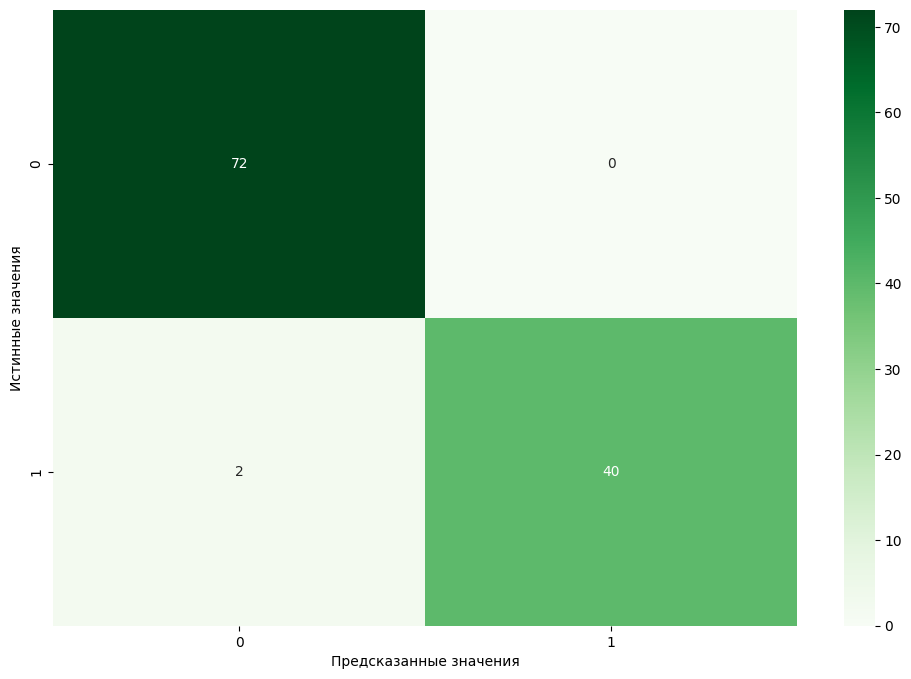

In [24]:
cm = confusion_matrix(target_test, predictions)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True,  fmt='d', cmap='Greens')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')

plt.show()

Отрицательный класс определён полностью верно, положительный класс определён правильно в 40 из 42 случаев.

Посмотрим, какие признаки оказались наиболее и наименее важными для модели в итоге.

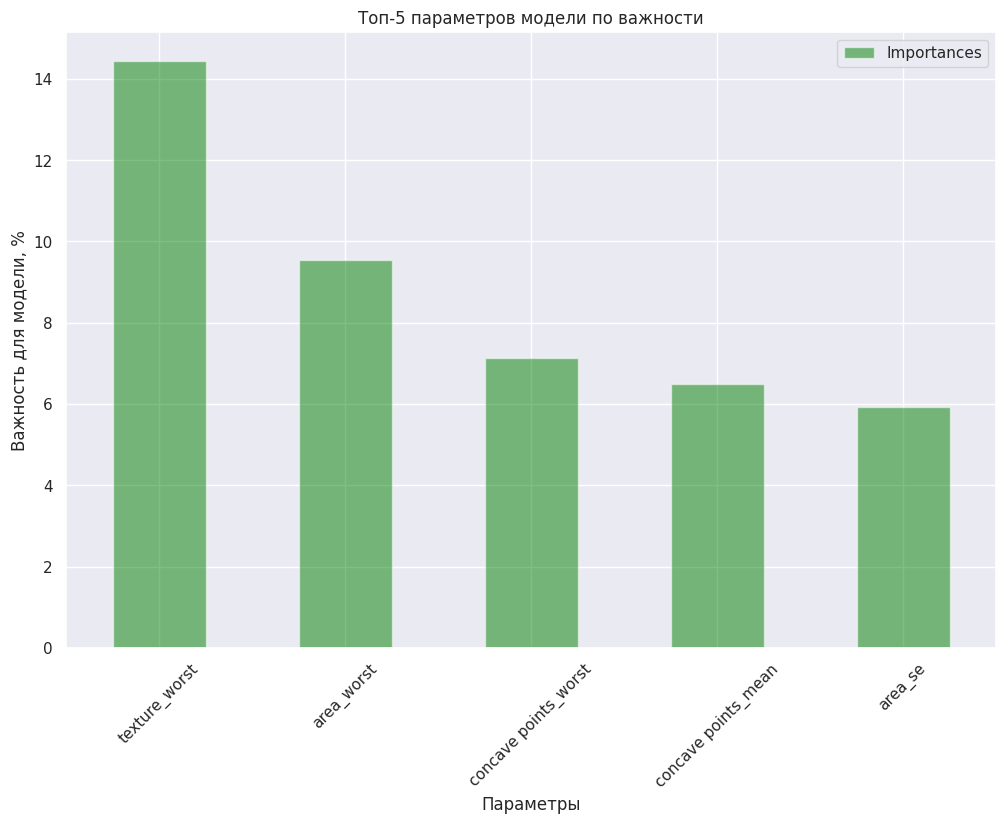

In [25]:
top_5_feature_importance = best_model.get_feature_importance(prettified=True).head(5)

sns.set(rc={'figure.figsize': (12, 8)})
top_5_feature_importance.plot(
    x='Feature Id', y='Importances', kind='bar', color='green', alpha=0.5
)
plt.xlabel('Параметры')
plt.ylabel('Важность для модели, %')
plt.title('Топ-5 параметров модели по важности')
plt.xticks(rotation=45)

plt.show()

In [26]:
low_5_feature_importance = best_model.get_feature_importance(prettified=True).tail(5)
low_5_feature_importance

,Feature Id,Importances
25,compactness_se,0.917875
26,smoothness_se,0.916612
27,radius_mean,0.742618
28,texture_se,0.516200
29,concavity_se,0.147921


# Выводы.

Как видно из итогов исследования, применения машинного обучения для рассматриваемой задачи вполне адекватно и даёт неплохие результаты. Однако 2 из 42 раковых опухоли из нашей тестовой выборки были всё-таки определены неверно, и это гораздо важнее правильного определения доброкачественных опухолей (которые на 100% классифицированы верно), поэтому можно сделать вывод: в случае реального применения машинного обучения для решения подобных задач необходимо оптимизировать модель для стремления её ложноположительной ошибки к нулю. В случае нашей конкретной модели для дальнейшего её улучшения можно попробовать убрать не значимые для модели признаки или попробовать ещё поработать (например, избавивишсь от мультиколлинеарности в признаках) с моделью логистической ргерессии, которая также неплохо показала себя на тренировочных данных.